In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Data Cleaning

## Dataset 1: Audit Rates

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# dfa: https://drive.google.com/file/d/1TLXSZwlrMKGA89DET2_dp4I3AEn5Te5H/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1TLXSZwlrMKGA89DET2_dp4I3AEn5Te5H'})
fileDownloaded.GetContentFile('audit_data_bycounty.csv')
dfa = pd.read_csv('audit_data_bycounty.csv')
dfa.head()

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk
0,1001,"Autauga County, Alabama",Alabama,95170.0,721.0,7.575917,7.575917
1,1003,"Baldwin County, Alabama",Alabama,362490.0,2833.0,7.815388,7.815388
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789
3,1007,"Bibb County, Alabama",Alabama,31840.0,260.0,8.165829,8.165829
4,1009,"Blount County, Alabama",Alabama,87970.0,673.0,7.650335,7.650335


In [ ]:
dfa[dfa['audit_rate'] != dfa['audit_rate_trunk']]

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk
67,2013,"Aleutians East Borough, Alaska",Alaska,3960.0,23.0,5.808081,6.0
71,2060,"Bristol Bay Borough, Alaska",Alaska,2140.0,7.0,3.271028,6.0
72,2068,"Denali Borough, Alaska",Alaska,4620.0,26.0,5.627706,6.0
89,2230,"Skagway Municipality, Alaska",Alaska,3050.0,18.0,5.901639,6.0
94,2282,"Yakutat City and Borough, Alaska",Alaska,1160.0,3.0,2.586207,6.0
...,...,...,...,...,...,...,...
2718,48393,"Roberts County, Texas",Texas,1600.0,6.0,3.750000,6.0
2737,48431,"Sterling County, Texas",Texas,2360.0,10.0,4.237288,6.0
2743,48443,"Terrell County, Texas",Texas,1550.0,6.0,3.870968,6.0
2780,49009,"Daggett County, Utah",Utah,1710.0,4.0,2.339181,6.0


## Dataset 2: Demographic

In [ ]:
# dfd: https://drive.google.com/file/d/1S3KELSrxBjzzRe8SFZzOVmeGsmsAh0Ht/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1S3KELSrxBjzzRe8SFZzOVmeGsmsAh0Ht'})
fileDownloaded.GetContentFile('asc2015_county_data.csv')
dfd = pd.read_csv('asc2015_county_data.csv')
dfd.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


## Merge

In [ ]:
dfm = dfa.merge(dfd, how = 'left', left_on='fips', right_on='CensusId').dropna()
dfm

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,"Autauga County, Alabama",Alabama,95170.0,721.0,7.575917,7.575917,1001.0,Alabama,Autauga,55221.0,26745.0,28476.0,2.6,75.8,18.5,0.4,1.0,0.0,40725.0,51281.0,2391.0,24974.0,1080.0,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986.0,73.6,20.9,5.5,0.0,7.6
1,1003,"Baldwin County, Alabama",Alabama,362490.0,2833.0,7.815388,7.815388,1003.0,Alabama,Baldwin,195121.0,95314.0,99807.0,4.5,83.1,9.5,0.6,0.7,0.0,147695.0,50254.0,1263.0,27317.0,711.0,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953.0,81.5,12.3,5.8,0.4,7.5
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789,1005.0,Alabama,Barbour,26932.0,14497.0,12435.0,4.6,46.2,46.7,0.2,0.4,0.0,20714.0,32964.0,2973.0,16824.0,798.0,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597.0,71.8,20.8,7.3,0.1,17.6
3,1007,"Bibb County, Alabama",Alabama,31840.0,260.0,8.165829,8.165829,1007.0,Alabama,Bibb,22604.0,12073.0,10531.0,2.2,74.5,21.4,0.4,0.1,0.0,17495.0,38678.0,3995.0,18431.0,1618.0,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294.0,76.8,16.1,6.7,0.4,8.3
4,1009,"Blount County, Alabama",Alabama,87970.0,673.0,7.650335,7.650335,1009.0,Alabama,Blount,57710.0,28512.0,29198.0,8.6,87.9,1.5,0.3,0.1,0.0,42345.0,45813.0,3141.0,20532.0,708.0,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189.0,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,"Sweetwater County, Wyoming",Wyoming,84960.0,578.0,6.803202,6.803202,56037.0,Wyoming,Sweetwater,44772.0,23359.0,21413.0,15.8,79.9,0.8,0.2,0.9,0.5,30965.0,69022.0,4015.0,30568.0,944.0,11.5,17.0,25.4,15.2,20.6,23.1,15.7,77.2,15.4,2.4,2.4,0.9,1.6,21.0,23010.0,78.6,17.7,3.7,0.0,5.4
3137,56039,"Teton County, Wyoming",Wyoming,57890.0,447.0,7.721541,7.721541,56039.0,Wyoming,Teton,22311.0,11537.0,10774.0,15.1,81.2,0.2,0.4,1.9,0.0,16371.0,75325.0,7370.0,44231.0,4473.0,7.4,7.1,39.1,25.7,19.6,9.3,6.3,64.0,7.5,7.8,10.3,4.9,5.5,14.4,14298.0,81.3,11.2,7.5,0.0,2.6
3138,56041,"Uinta County, Wyoming",Wyoming,37540.0,266.0,7.085775,7.085775,56041.0,Wyoming,Uinta,20930.0,10636.0,10294.0,8.9,87.8,0.2,0.4,0.1,0.0,14357.0,56569.0,4738.0,25772.0,1763.0,13.7,18.3,30.1,18.3,19.1,16.7,15.8,77.1,12.7,2.8,2.8,1.6,3.0,20.4,10064.0,75.4,19.0,5.6,0.0,4.4
3139,56043,"Washakie County, Wyoming",Wyoming,15830.0,110.0,6.948831,6.948831,56043.0,Wyoming,Washakie,8400.0,4144.0,4256.0,14.0,82.4,0.7,0.3,0.2,0.0,6090.0,47652.0,4384.0,27394.0,2542.0,13.8,17.9,29.3,18.2,19.3,20.4,12.7,74.1,12.3,0.0,6.2,2.8,4.5,12.3,3892.0,70.5,21.5,7.6,0.5,6.8


In [ ]:
dfm.to_csv('audit-demographics-merged.csv', index = False)

In [ ]:
# dfm: https://drive.google.com/file/d/1in79fSxbDbSuXwpvIfN94B7LfhWXGX7c/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1in79fSxbDbSuXwpvIfN94B7LfhWXGX7c'})
fileDownloaded.GetContentFile('audit-demographics-merged.csv')
dfm = pd.read_csv('audit-demographics-merged.csv')
dfm.head()

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,"Autauga County, Alabama",Alabama,95170.0,721.0,7.575917,7.575917,1,1,1001.0,Alabama,Autauga,55221.0,26745.0,28476.0,2.6,75.8,18.5,0.4,1.0,0.0,40725.0,51281.0,2391.0,24974.0,1080.0,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986.0,73.6,20.9,5.5,0.0,7.6
1,1003,"Baldwin County, Alabama",Alabama,362490.0,2833.0,7.815388,7.815388,1,3,1003.0,Alabama,Baldwin,195121.0,95314.0,99807.0,4.5,83.1,9.5,0.6,0.7,0.0,147695.0,50254.0,1263.0,27317.0,711.0,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953.0,81.5,12.3,5.8,0.4,7.5
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789,1,5,1005.0,Alabama,Barbour,26932.0,14497.0,12435.0,4.6,46.2,46.7,0.2,0.4,0.0,20714.0,32964.0,2973.0,16824.0,798.0,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597.0,71.8,20.8,7.3,0.1,17.6
3,1007,"Bibb County, Alabama",Alabama,31840.0,260.0,8.165829,8.165829,1,7,1007.0,Alabama,Bibb,22604.0,12073.0,10531.0,2.2,74.5,21.4,0.4,0.1,0.0,17495.0,38678.0,3995.0,18431.0,1618.0,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294.0,76.8,16.1,6.7,0.4,8.3
4,1009,"Blount County, Alabama",Alabama,87970.0,673.0,7.650335,7.650335,1,9,1009.0,Alabama,Blount,57710.0,28512.0,29198.0,8.6,87.9,1.5,0.3,0.1,0.0,42345.0,45813.0,3141.0,20532.0,708.0,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189.0,82.0,13.5,4.2,0.4,7.7


# Model

In [ ]:
dfm['MalePct'] = dfm['Men'] / (dfm['Men'] + dfm['Women'])
dfm

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Male_Percentage
0,1001,"Autauga County, Alabama",Alabama,95170.0,721.0,7.575917,7.575917,1001.0,Alabama,Autauga,55221.0,26745.0,28476.0,2.6,75.8,18.5,0.4,1.0,0.0,40725.0,51281.0,2391.0,24974.0,1080.0,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986.0,73.6,20.9,5.5,0.0,7.6,0.484327
1,1003,"Baldwin County, Alabama",Alabama,362490.0,2833.0,7.815388,7.815388,1003.0,Alabama,Baldwin,195121.0,95314.0,99807.0,4.5,83.1,9.5,0.6,0.7,0.0,147695.0,50254.0,1263.0,27317.0,711.0,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953.0,81.5,12.3,5.8,0.4,7.5,0.488487
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789,1005.0,Alabama,Barbour,26932.0,14497.0,12435.0,4.6,46.2,46.7,0.2,0.4,0.0,20714.0,32964.0,2973.0,16824.0,798.0,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597.0,71.8,20.8,7.3,0.1,17.6,0.538282
3,1007,"Bibb County, Alabama",Alabama,31840.0,260.0,8.165829,8.165829,1007.0,Alabama,Bibb,22604.0,12073.0,10531.0,2.2,74.5,21.4,0.4,0.1,0.0,17495.0,38678.0,3995.0,18431.0,1618.0,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294.0,76.8,16.1,6.7,0.4,8.3,0.534109
4,1009,"Blount County, Alabama",Alabama,87970.0,673.0,7.650335,7.650335,1009.0,Alabama,Blount,57710.0,28512.0,29198.0,8.6,87.9,1.5,0.3,0.1,0.0,42345.0,45813.0,3141.0,20532.0,708.0,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189.0,82.0,13.5,4.2,0.4,7.7,0.494056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,"Sweetwater County, Wyoming",Wyoming,84960.0,578.0,6.803202,6.803202,56037.0,Wyoming,Sweetwater,44772.0,23359.0,21413.0,15.8,79.9,0.8,0.2,0.9,0.5,30965.0,69022.0,4015.0,30568.0,944.0,11.5,17.0,25.4,15.2,20.6,23.1,15.7,77.2,15.4,2.4,2.4,0.9,1.6,21.0,23010.0,78.6,17.7,3.7,0.0,5.4,0.521732
3137,56039,"Teton County, Wyoming",Wyoming,57890.0,447.0,7.721541,7.721541,56039.0,Wyoming,Teton,22311.0,11537.0,10774.0,15.1,81.2,0.2,0.4,1.9,0.0,16371.0,75325.0,7370.0,44231.0,4473.0,7.4,7.1,39.1,25.7,19.6,9.3,6.3,64.0,7.5,7.8,10.3,4.9,5.5,14.4,14298.0,81.3,11.2,7.5,0.0,2.6,0.517099
3138,56041,"Uinta County, Wyoming",Wyoming,37540.0,266.0,7.085775,7.085775,56041.0,Wyoming,Uinta,20930.0,10636.0,10294.0,8.9,87.8,0.2,0.4,0.1,0.0,14357.0,56569.0,4738.0,25772.0,1763.0,13.7,18.3,30.1,18.3,19.1,16.7,15.8,77.1,12.7,2.8,2.8,1.6,3.0,20.4,10064.0,75.4,19.0,5.6,0.0,4.4,0.508170
3139,56043,"Washakie County, Wyoming",Wyoming,15830.0,110.0,6.948831,6.948831,56043.0,Wyoming,Washakie,8400.0,4144.0,4256.0,14.0,82.4,0.7,0.3,0.2,0.0,6090.0,47652.0,4384.0,27394.0,2542.0,13.8,17.9,29.3,18.2,19.3,20.4,12.7,74.1,12.3,0.0,6.2,2.8,4.5,12.3,3892.0,70.5,21.5,7.6,0.5,6.8,0.493333


In [ ]:
# X = dfmm.drop(columns = ['fips', 'name', 'state', 'CensusId', 'State', 'County', 'audit_rate'], axis

X = dfmm[['Male_Percentage', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income']]

In [ ]:
y = dfmm['audit_rate']
y

0       7.575917
1       7.815388
2       9.127789
3       8.165829
4       7.650335
          ...   
3136    6.803202
3137    7.721541
3138    7.085775
3139    6.948831
3140    7.244212
Name: audit_rate, Length: 3138, dtype: float64

In [ ]:
import statsmodels.api as sm

mod = sm.OLS(y, X)

In [ ]:
res = mod.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             audit_rate   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          3.865e+04
Date:                Sat, 22 May 2021   Prob (F-statistic):                        0.00
Time:                        16:16:22   Log-Likelihood:                         -3489.6
No. Observations:                3138   AIC:                                      6997.
Df Residuals:                    3129   BIC:                                      7052.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Male_Percentage    -0.4521      0.538     -0.841      0.401      -1.507       0.602
Hispanic            0.1041      0.003     34.611      0.000       0.098       0.110
White               0.0909      0.003     32.702      0.000       0.085       0.096
Black               0.1197      0.003     42.829      0.000       0.114       0.125
Native              0.1151      0.004     32.223      0.000       0.108       0.122
Asian               0.1276      0.008     16.183      0.000       0.112       0.143
Pacific             0.1670      0.039      4.268      0.000       0.090       0.244
Citizen         -3.872e-08   7.43e-08     -0.521      0.602   -1.84e-07    1.07e-07
Income          -3.042e-05   1.28e-06    -23.681      0.000   -3.29e-05   -2.79e-05
==============================================================================
Omnibus:                     2339.049   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87318.130
Skew:                          -3.141   Prob(JB):                         0.00
Kurtosis:                      28.067   Cond. No.                     9.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# EDA

In [ ]:
dfm.dropna(inplace=True)

In [ ]:
import statsmodels.api as sm

mod = sm.OLS(dfm['audit_rate'],  dfm['nwpp'])

In [ ]:
res = mod.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             audit_rate   R-squared (uncentered):                   0.513
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              3311.
Date:                Sat, 22 May 2021   Prob (F-statistic):                        0.00
Time:                        14:55:01   Log-Likelihood:                         -9767.4
No. Observations:                3139   AIC:                                  1.954e+04
Df Residuals:                    3138   BIC:                                  1.954e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nwpp          25.2776      0.439     57.545      0.000      24.416      26.139
==============================================================================
Omnibus:                     1052.602   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3078.851
Skew:                          -1.760   Prob(JB):                         0.00
Kurtosis:                       6.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dfm.audit_rate.mean()

7.728784140294767

In [ ]:
dfm[dfm['nwpp'] > .5]

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,WP,nwpp
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789,1,5,50.0,1.0,5.0,Alabama,Barbour County,26283.0,13088.0,0.502036
5,1011,"Bullock County, Alabama",Alabama,15420.0,150.0,9.727626,9.727626,1,11,50.0,1.0,11.0,Alabama,Bullock County,10400.0,2737.0,0.736827
23,1047,"Dallas County, Alabama",Alabama,66530.0,675.0,10.145799,10.145799,1,47,50.0,1.0,47.0,Alabama,Dallas County,40936.0,11593.0,0.716802
31,1063,"Greene County, Alabama",Alabama,13760.0,150.0,10.901163,10.901163,1,63,50.0,1.0,63.0,Alabama,Greene County,8508.0,1478.0,0.826281
32,1065,"Hale County, Alabama",Alabama,25630.0,237.0,9.246976,9.246976,1,65,50.0,1.0,65.0,Alabama,Hale County,15015.0,6120.0,0.592408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,51710,"Norfolk city, Virginia",Virginia,416390.0,3417.0,8.206249,8.206249,51,710,50.0,51.0,710.0,Virginia,Norfolk city,246457.0,121121.0,0.508551
2939,51730,"Petersburg city, Virginia",Virginia,64980.0,560.0,8.618036,8.618036,51,730,50.0,51.0,730.0,Virginia,Petersburg city,31892.0,5688.0,0.821648
2941,51740,"Portsmouth city, Virginia",Virginia,182610.0,1479.0,8.099228,8.099228,51,740,50.0,51.0,740.0,Virginia,Portsmouth city,96336.0,39776.0,0.587112
2943,51760,"Richmond city, Virginia",Virginia,396550.0,3217.0,8.112470,8.112470,51,760,50.0,51.0,760.0,Virginia,Richmond city,220856.0,98589.0,0.553605


In [ ]:
dfm[dfm['CTYNAME'] == 'Los Angeles']

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,WP,nwpp


In [ ]:
dfm.merge(dfu, how = 'left', on = ['st_code', 'cty_code'])

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,WP,nwpp,Region Name,Region Code,unemployment rate
0,1001,"Autauga County, Alabama",Alabama,95170.0,721.0,7.575917,7.575917,1,1,50.0,1.0,1.0,Alabama,Autauga County,54864.0,42650.0,0.222623,"Autauga County, AL",1001.0,5.2
1,1003,"Baldwin County, Alabama",Alabama,362490.0,2833.0,7.815388,7.815388,1,3,50.0,1.0,3.0,Alabama,Baldwin County,202939.0,177081.0,0.127418,"Baldwin County, AL",1003.0,5.5
2,1005,"Barbour County, Alabama",Alabama,39440.0,360.0,9.127789,9.127789,1,5,50.0,1.0,5.0,Alabama,Barbour County,26283.0,13088.0,0.502036,"Barbour County, AL",1005.0,8.9
3,1007,"Bibb County, Alabama",Alabama,31840.0,260.0,8.165829,8.165829,1,7,50.0,1.0,7.0,Alabama,Bibb County,22566.0,17251.0,0.235531,"Bibb County, AL",1007.0,6.6
4,1009,"Blount County, Alabama",Alabama,87970.0,673.0,7.650335,7.650335,1,9,50.0,1.0,9.0,Alabama,Blount County,57526.0,55268.0,0.039252,"Blount County, AL",1009.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,56037,"Sweetwater County, Wyoming",Wyoming,84960.0,578.0,6.803202,6.803202,56,37,50.0,56.0,37.0,Wyoming,Sweetwater County,44719.0,42180.0,0.056777,"Sweetwater County, WY",56037.0,4.7
3135,56039,"Teton County, Wyoming",Wyoming,57890.0,447.0,7.721541,7.721541,56,39,50.0,56.0,39.0,Wyoming,Teton County,23047.0,22012.0,0.044908,"Teton County, WY",56039.0,4.0
3136,56041,"Uinta County, Wyoming",Wyoming,37540.0,266.0,7.085775,7.085775,56,41,50.0,56.0,41.0,Wyoming,Uinta County,20763.0,19865.0,0.043250,"Uinta County, WY",56041.0,5.0
3137,56043,"Washakie County, Wyoming",Wyoming,15830.0,110.0,6.948831,6.948831,56,43,50.0,56.0,43.0,Wyoming,Washakie County,8278.0,7847.0,0.052066,"Washakie County, WY",56043.0,4.2


In [ ]:
dfm.sort_values('audit_rate')

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2650,48261,"Kenedy County, Texas",Texas,640.0,0.0,0.000000,6.0,48,261,48261.0,Texas,Kenedy,565.0,295.0,270.0,66.2,33.6,0.0,0.0,0.2,0.0,316.0,36438.0,10695.0,14251.0,3914.0,26.7,39.3,24.9,34.1,20.5,20.5,0.0,94.6,0.0,0.0,5.4,0.0,0.0,16.6,185.0,51.9,48.1,0.0,0.0,0.0
2654,48269,"King County, Texas",Texas,490.0,0.0,0.000000,6.0,48,269,48269.0,Texas,King,267.0,136.0,131.0,24.7,75.3,0.0,0.0,0.0,0.0,199.0,63250.0,21355.0,30269.0,7395.0,7.1,10.5,34.3,10.2,13.9,39.2,2.4,88.6,0.0,0.0,7.8,0.0,3.6,11.6,166.0,72.9,21.1,6.0,0.0,5.1
2536,48033,"Borden County, Texas",Texas,1040.0,1.0,0.961538,6.0,48,33,48033.0,Texas,Borden,705.0,362.0,343.0,8.8,87.9,0.0,3.0,0.0,0.0,490.0,73750.0,8208.0,44591.0,15266.0,1.4,0.0,52.8,11.7,14.2,14.2,7.1,78.6,10.4,0.0,0.7,0.7,9.6,24.9,282.0,45.7,36.2,17.0,1.1,0.7
1689,31075,"Grant County, Nebraska",Nebraska,1330.0,2.0,1.503759,6.0,31,75,31075.0,Nebraska,Grant,769.0,392.0,377.0,5.3,94.7,0.0,0.0,0.0,0.0,606.0,44750.0,6041.0,21782.0,3052.0,13.3,14.6,40.2,12.4,15.6,20.6,11.2,64.8,10.4,0.0,11.1,2.2,11.6,25.7,418.0,67.2,12.2,20.6,0.0,3.5
1655,31007,"Banner County, Nebraska",Nebraska,1210.0,2.0,1.652893,6.0,31,7,31007.0,Nebraska,Banner,820.0,399.0,421.0,3.8,93.5,1.2,0.0,0.1,0.0,681.0,48897.0,4107.0,31735.0,7621.0,11.7,17.3,44.6,9.7,22.9,14.7,8.1,59.2,11.6,0.0,10.0,0.0,19.2,25.2,455.0,60.4,19.1,20.4,0.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,28125,"Sharkey County, Mississippi",Mississippi,7570.0,85.0,11.228534,11.0,28,125,28125.0,Mississippi,Sharkey,4805.0,2139.0,2666.0,0.6,27.7,71.3,0.0,0.4,0.0,3566.0,30525.0,4079.0,15993.0,1369.0,29.3,33.9,36.4,27.4,21.3,11.6,3.3,82.3,13.6,1.7,1.7,0.3,0.4,20.0,1678.0,71.7,23.5,4.7,0.1,22.1
1450,28103,"Noxubee County, Mississippi",Mississippi,19050.0,214.0,11.233596,11.0,28,103,28103.0,Mississippi,Noxubee,11143.0,5346.0,5797.0,1.4,26.5,71.9,0.1,0.0,0.0,8060.0,26677.0,4993.0,14450.0,1373.0,36.4,46.9,22.9,21.9,15.2,13.3,26.8,74.2,14.1,2.2,4.1,0.6,4.8,27.6,3841.0,72.8,16.1,10.0,1.0,19.0
1128,22035,"East Carroll Parish, Louisiana",Louisiana,10660.0,122.0,11.444653,11.0,22,35,22035.0,Louisiana,East Carroll,7501.0,4272.0,3229.0,1.3,28.1,69.7,0.0,0.2,0.0,5638.0,21099.0,2897.0,11313.0,1556.0,48.0,66.9,27.9,27.6,15.5,14.5,14.5,86.8,7.3,0.0,1.5,0.7,3.6,13.9,1882.0,74.1,21.8,4.1,0.0,19.2
1470,28143,"Tunica County, Mississippi",Mississippi,19370.0,223.0,11.512648,11.0,28,143,28143.0,Mississippi,Tunica,10477.0,4916.0,5561.0,1.3,21.1,75.5,0.0,0.7,0.0,7198.0,31211.0,2159.0,17246.0,2494.0,27.3,39.0,23.9,36.6,21.5,3.5,14.5,87.9,7.5,1.2,2.4,0.0,1.0,21.7,4191.0,82.6,15.6,1.7,0.1,12.4


In [ ]:
dfm.drop([2650, 2654], inplace=True)
dfm.sort_values('audit_rate').head()

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk,st_code,cty_code,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2536,48033,"Borden County, Texas",Texas,1040.0,1.0,0.961538,6.0,48,33,48033.0,Texas,Borden,705.0,362.0,343.0,8.8,87.9,0.0,3.0,0.0,0.0,490.0,73750.0,8208.0,44591.0,15266.0,1.4,0.0,52.8,11.7,14.2,14.2,7.1,78.6,10.4,0.0,0.7,0.7,9.6,24.9,282.0,45.7,36.2,17.0,1.1,0.7
1689,31075,"Grant County, Nebraska",Nebraska,1330.0,2.0,1.503759,6.0,31,75,31075.0,Nebraska,Grant,769.0,392.0,377.0,5.3,94.7,0.0,0.0,0.0,0.0,606.0,44750.0,6041.0,21782.0,3052.0,13.3,14.6,40.2,12.4,15.6,20.6,11.2,64.8,10.4,0.0,11.1,2.2,11.6,25.7,418.0,67.2,12.2,20.6,0.0,3.5
1655,31007,"Banner County, Nebraska",Nebraska,1210.0,2.0,1.652893,6.0,31,7,31007.0,Nebraska,Banner,820.0,399.0,421.0,3.8,93.5,1.2,0.0,0.1,0.0,681.0,48897.0,4107.0,31735.0,7621.0,11.7,17.3,44.6,9.7,22.9,14.7,8.1,59.2,11.6,0.0,10.0,0.0,19.2,25.2,455.0,60.4,19.1,20.4,0.0,5.4
1650,30109,"Wibaux County, Montana",Montana,1990.0,4.0,2.010050,6.0,30,109,30109.0,Montana,Wibaux,986.0,485.0,501.0,1.3,98.7,0.0,0.0,0.0,0.0,784.0,38553.0,10791.0,23875.0,3063.0,15.3,17.6,37.9,19.9,10.9,15.8,15.5,71.0,8.8,0.0,10.2,0.7,9.3,20.0,457.0,56.2,28.4,14.7,0.7,3.0
2651,48263,"Kent County, Texas",Texas,1390.0,3.0,2.158273,6.0,48,263,48263.0,Texas,Kent,821.0,423.0,398.0,17.9,81.5,0.2,0.4,0.0,0.0,637.0,47024.0,8739.0,27962.0,4474.0,9.6,24.8,39.7,16.3,16.8,17.8,9.3,72.8,8.3,0.0,13.5,1.8,3.6,9.7,398.0,49.7,38.9,10.1,1.3,1.5


## Gender

In [ ]:
dfm['MalePct'] = dfm['Men'] / dfm['TotalPop']

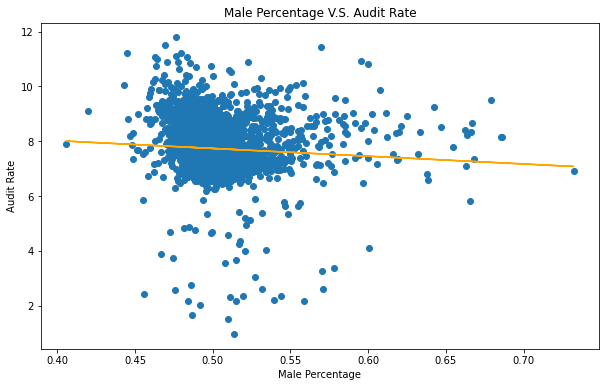

In [ ]:
x = dfm['MalePct']
y = dfm['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Male Percentage')
plt.ylabel('Audit Rate')
plt.title('Male Percentage V.S. Audit Rate')
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')

plt.show()

Top 30

In [ ]:
df_top30 = dfm.sort_values('audit_rate', ascending=False)[['audit_rate', 'MalePct']].head(30)
df_top30.head()

,audit_rate,MalePct
1425,11.790079,0.476180
1470,11.512648,0.469218
1128,11.444653,0.569524
1450,11.233596,0.479763
1461,11.228534,0.445161


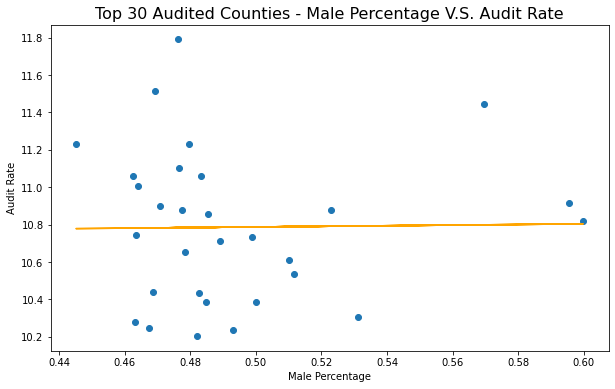

In [ ]:
x = df_top30['MalePct']
y = df_top30['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Male Percentage')
plt.ylabel('Audit Rate')
plt.title('Top 30 Audited Counties - Male Percentage V.S. Audit Rate', fontsize=16)
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')

plt.show()

Bottom 30

In [ ]:
df_bottom30 = dfm.sort_values('audit_rate', ascending=True)[['audit_rate', 'MalePct']].head(30)
df_bottom30.head()

,audit_rate,MalePct
2536,0.961538,0.513475
1689,1.503759,0.509753
1655,1.652893,0.486585
1650,2.010050,0.491886
2651,2.158273,0.515225


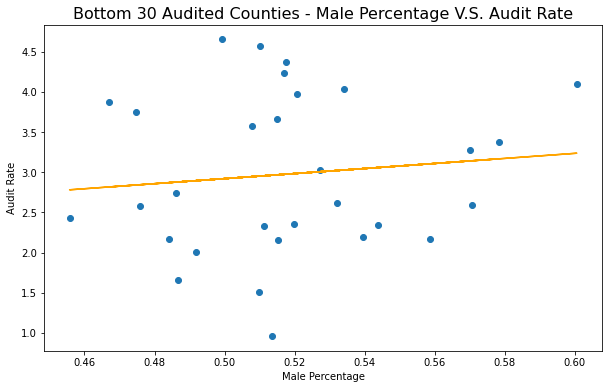

In [ ]:
x = df_bottom30['MalePct']
y = df_bottom30['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Male Percentage')
plt.ylabel('Audit Rate')
plt.title('Bottom 30 Audited Counties - Male Percentage V.S. Audit Rate', fontsize=16)
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')
plt.show()

## Professional
Professional: percent employed in management, business, science, and arts


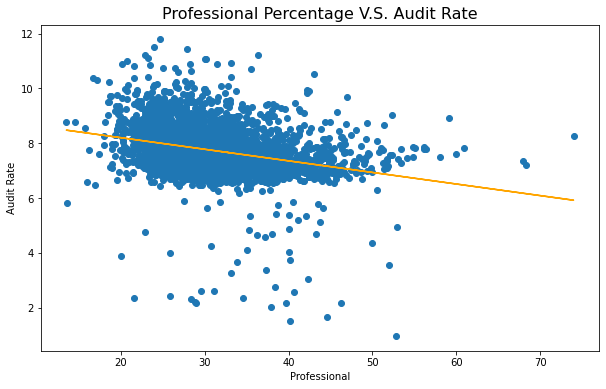

In [ ]:
x = dfm['Professional']
y = dfm['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Professional')
plt.ylabel('Audit Rate')
plt.title('Professional Percentage V.S. Audit Rate', fontsize=16)
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')
plt.show()

Top 30

In [ ]:
df_top30 = dfm.sort_values('audit_rate', ascending=False)[['audit_rate', 'Professional']].head(30)
df_top30.head()

,audit_rate,Professional
1425,11.790079,24.7
1470,11.512648,23.9
1128,11.444653,27.9
1450,11.233596,22.9
1461,11.228534,36.4


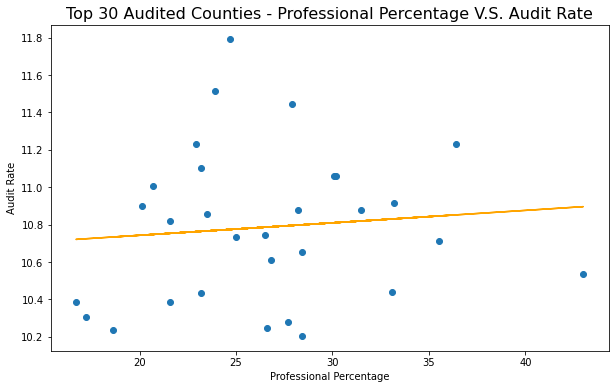

In [ ]:
x = df_top30['Professional']
y = df_top30['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Professional Percentage')
plt.ylabel('Audit Rate')
plt.title('Top 30 Audited Counties - Professional Percentage V.S. Audit Rate', fontsize=16)
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')
plt.show()

Bottom 30

In [ ]:
df_bottom30 = dfm.sort_values('audit_rate', ascending=True)[['audit_rate', 'Professional']].head(30)
df_bottom30.head()

,audit_rate,Professional
2536,0.961538,52.8
1689,1.503759,40.2
1655,1.652893,44.6
1650,2.010050,37.9
2651,2.158273,39.7


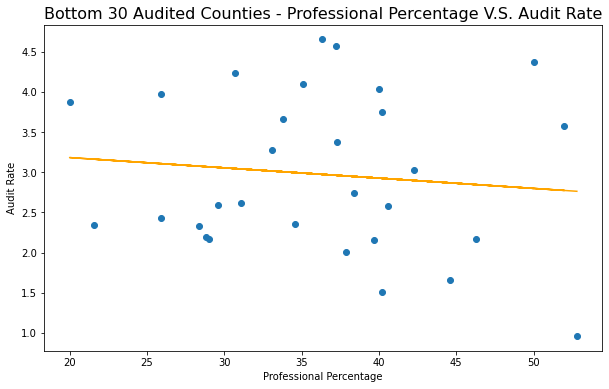

In [ ]:
x = df_bottom30['Professional']
y = df_bottom30['audit_rate']

plt.figure(figsize=(10,6))
plt.xlabel('Professional Percentage')
plt.ylabel('Audit Rate')
plt.title('Bottom 30 Audited Counties - Professional Percentage V.S. Audit Rate', fontsize=16)
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
# a=slope, b=intercept
plt.plot(x, a*x + b, color='orange')
plt.show()

## Race

## Income

## Unemployment